In [41]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Load the uploaded CSV file
file_path = 'drive/MyDrive/Colab Notebooks/all_reviews_with_mapping.csv'  # Replace with the correct path in your Google Drive

data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SaaS ID                  434 non-null    int64  
 1   SaaS                     434 non-null    object 
 2   Review Date              434 non-null    object 
 3   Review ID                434 non-null    int64  
 4   Company Name             339 non-null    object 
 5   Industry                 434 non-null    object 
 6   Job                      434 non-null    object 
 7   Using Count              434 non-null    object 
 8   Rating                   434 non-null    float64
 9   Comment                  179 non-null    object 
 10  Pros                     434 non-null    object 
 11  Cons                     301 non-null    object 
 12  reviewQuestion_기능 만족도    434 non-null    object 
 13  Feature: 기능 만족도          434 non-null    float64
 14  reviewQuestion_사용 난이도    4

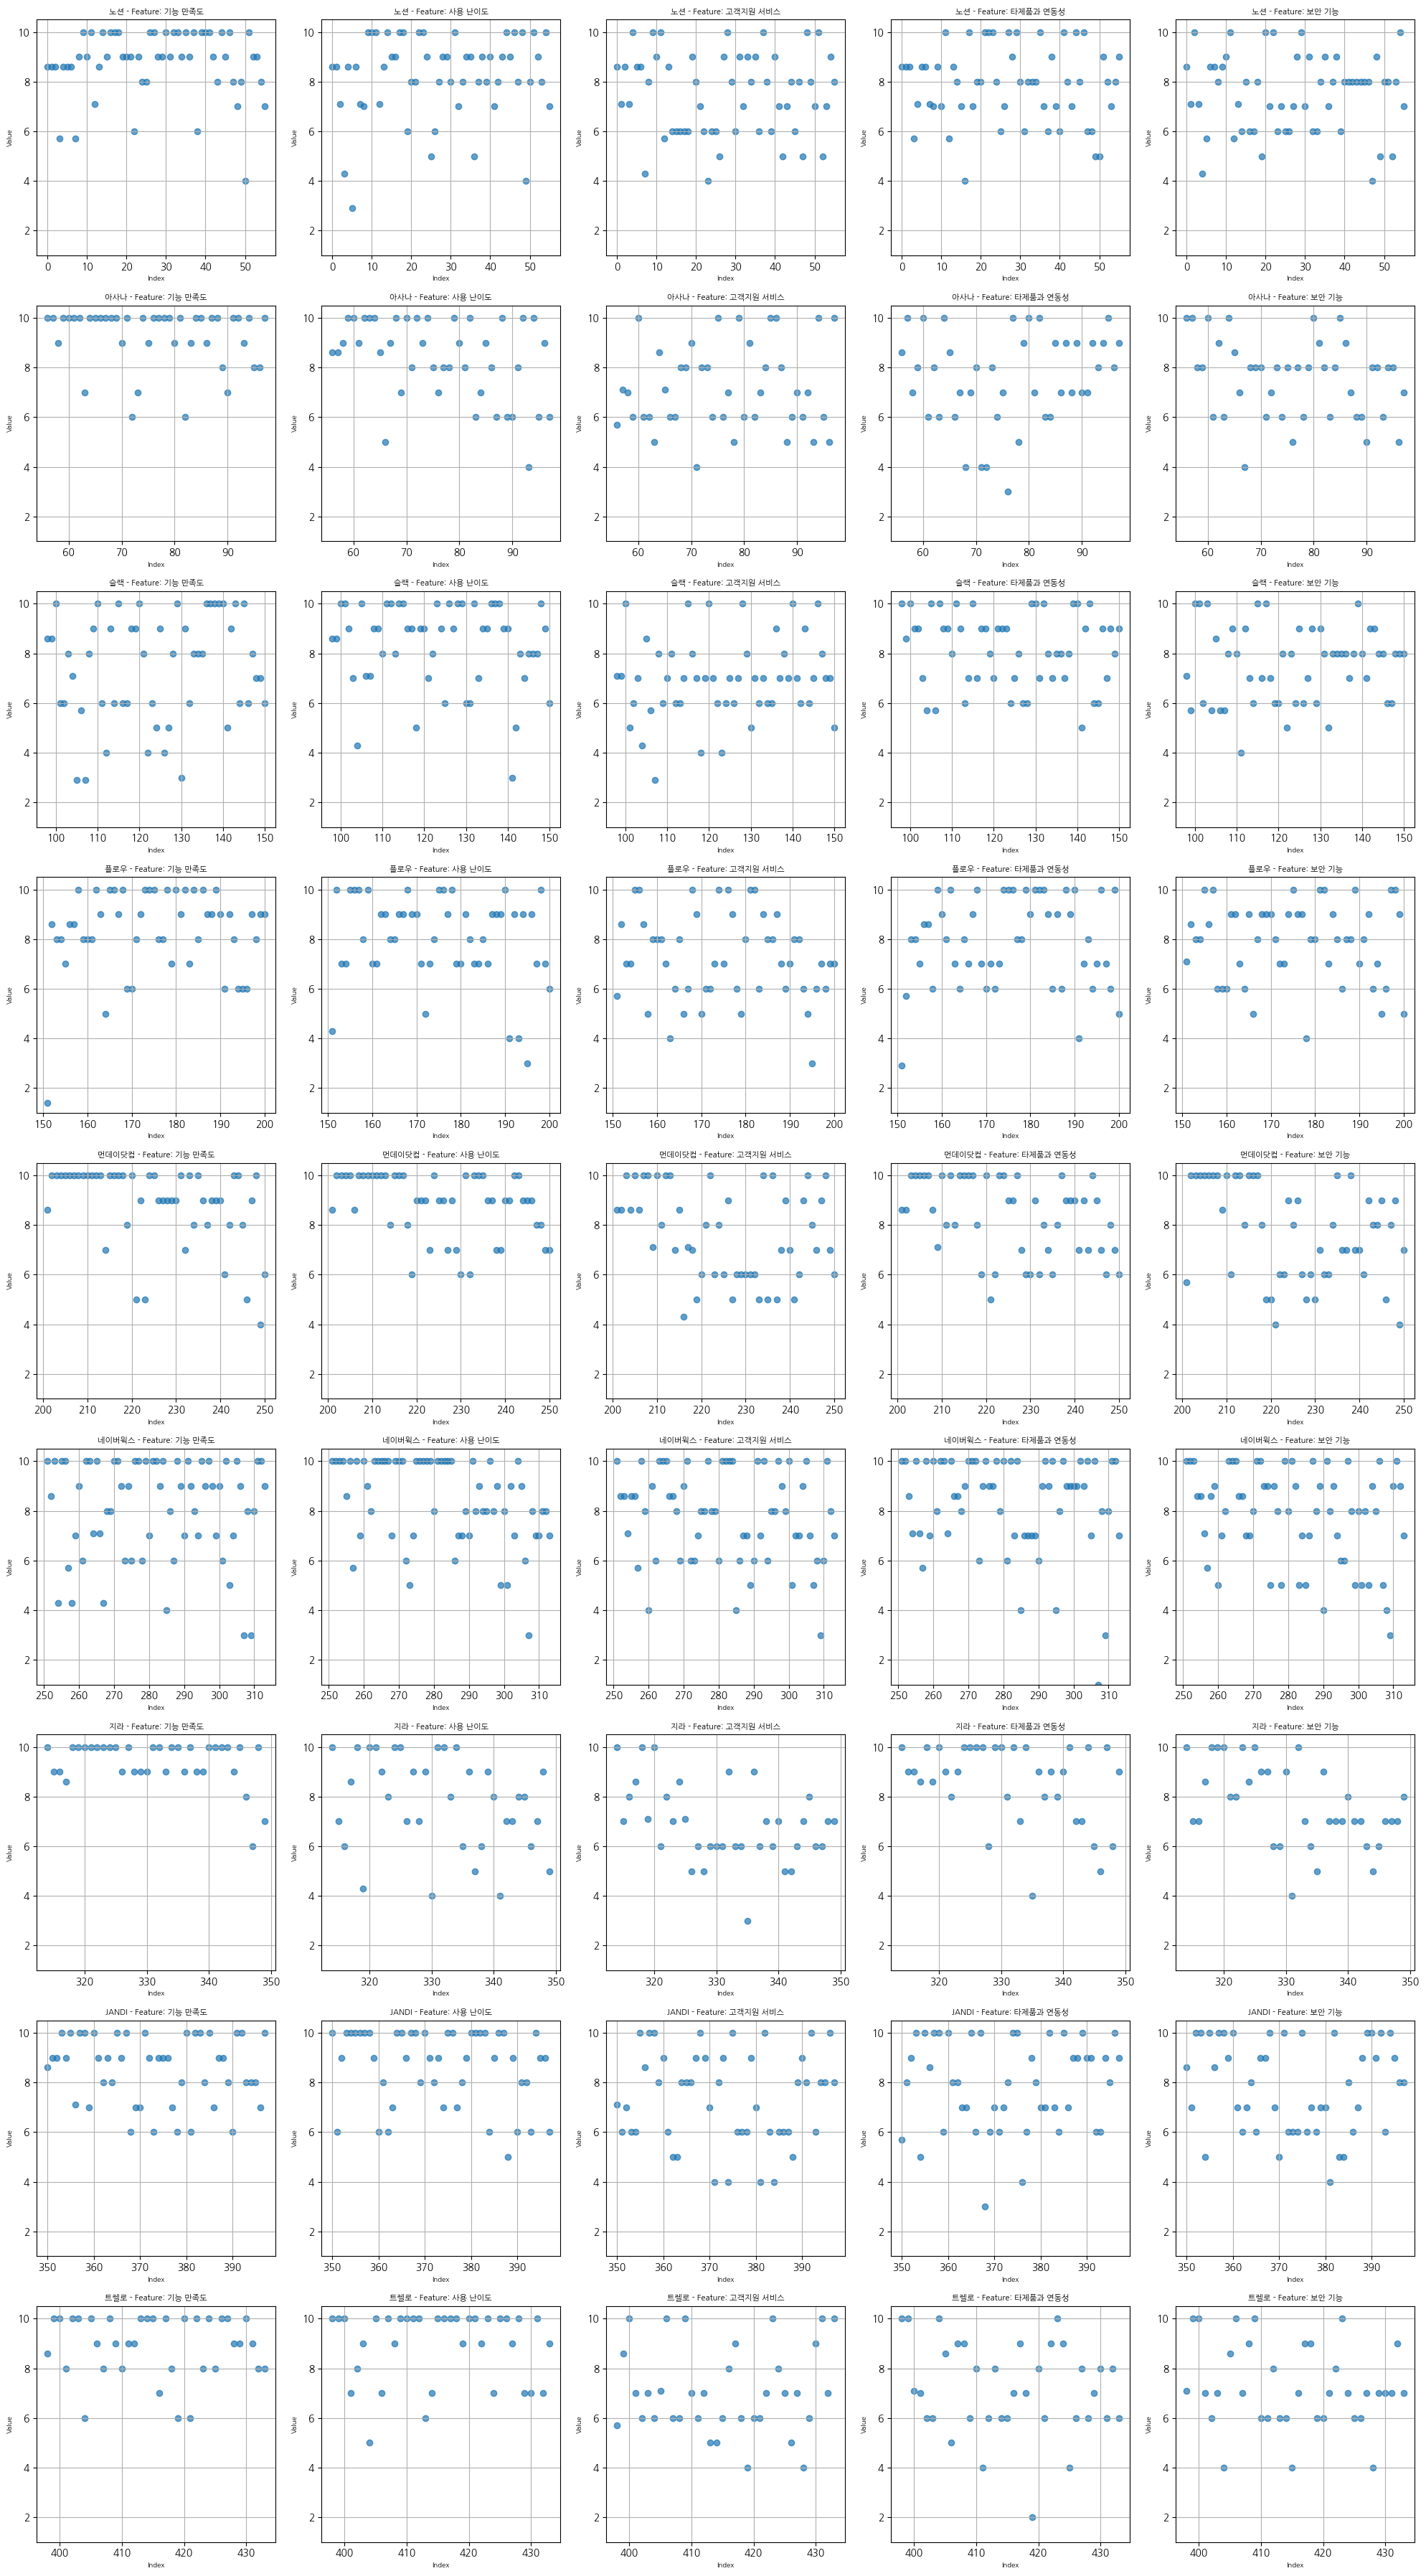

In [20]:
import matplotlib.pyplot as plt

# B열 (SaaS 업체명) 고유 값 가져오기
saas_companies = data['SaaS'].unique()

# Feature 컬럼 리스트
feature_columns = [
    'Feature: 기능 만족도',
    'Feature: 사용 난이도',
    'Feature: 고객지원 서비스',
    'Feature: 타제품과 연동성',
    'Feature: 보안 기능'
]

# 전체 데이터에서 Feature 컬럼의 최저값 찾기
min_value = data[feature_columns].min().min()

# 그래프 크기 설정
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 36))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # 그래프 간 여백 조정

# 그래프 인덱스 초기화
row_idx = 0
col_idx = 0

# 각 SaaS 기업별로 반복
for company in saas_companies:
    # 해당 기업의 데이터 필터링
    company_data = data[data['SaaS'] == company]

    # 각 Feature별 그래프 그리기
    for feature in feature_columns:
        ax = axes[row_idx, col_idx]
        ax.scatter(company_data.index, company_data[feature], alpha=0.7)
        ax.set_title(f"{company} - {feature}", fontsize=8)
        ax.set_xlabel("Index", fontsize=7)
        ax.set_ylabel("Value", fontsize=7)
        ax.set_ylim(min_value, company_data[feature].max() + 0.5)
        ax.grid(True)

        # 다음 열로 이동
        col_idx += 1
        if col_idx == 5:  # 5열에 도달하면 행 이동
            col_idx = 0
            row_idx += 1

# 전체 레이아웃 설정 및 표시
plt.tight_layout()
plt.show()


In [16]:
# SaaS 업체별 데이터 개수 계산
saas_data_counts = data['SaaS'].value_counts()

# 데이터 총합 계산
total_rows = saas_data_counts.sum()

# 총합 출력
print(f"데이터의 총 개수: {total_rows}")

# SaaS 업체별 데이터 개수 출력
saas_data_counts



데이터의 총 개수: 434


,count
SaaS,
네이버웍스,63
노션,56
슬랙,53
플로우,50
먼데이닷컴,50
JANDI,48
아사나,42
지라,36
트렐로,36


In [32]:
# 이상치 행 전체를 추출하고 여러 Feature 정보를 기록하여 결합
outlier_rows = pd.DataFrame()

# 각 Feature에 대해 이상치 데이터 추출 및 여러 컬럼 정보를 누적 저장
for feature in feature_columns:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 조건
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 데이터 추출
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].copy()

    # 기존 데이터와 합칠 때, 동일한 행에 대해 여러 컬럼 정보를 누적
    outliers['Outlier Column'] = feature
    outlier_rows = pd.concat([outlier_rows, outliers])

# 같은 행에서 여러 Feature에 대해 이상치가 있는 경우 컬럼명을 누적
outlier_rows = outlier_rows.groupby(outlier_rows.index).agg({
    **{col: 'first' for col in data.columns},  # 기존 컬럼 유지
    'Outlier Column': ', '.join  # 이상치 컬럼명 누적
}).reset_index(drop=True)

# 이상치 컬럼명을 가장 왼쪽으로 이동
columns_order = ['Outlier Column'] + [col for col in outlier_rows.columns if col != 'Outlier Column']
outlier_rows = outlier_rows[columns_order]

In [33]:
outlier_rows

,Outlier Column,SaaS ID,SaaS,Review Date,Review ID,Company Name,Industry,Job,Using Count,Rating,...,reviewQuestion_기능 만족도,Feature: 기능 만족도,reviewQuestion_사용 난이도,Feature: 사용 난이도,reviewQuestion_고객지원 서비스,Feature: 고객지원 서비스,reviewQuestion_타제품과 연동성,Feature: 타제품과 연동성,reviewQuestion_보안 기능,Feature: 보안 기능
0,Feature: 기능 만족도,191,노션,2022-06-08,1488,None,INDUSTRY_CODE_3,경영/관리,30~100명 이내,6.3,...,해당 소프트웨어 도입 시 필요로 했던 기능들 전반을 잘 사용 중이며 만족한다.,4.0,UI/UX가 직관적이고 이해하기 쉽게 구성되어 있어 사용하기 쉽다.,8.0,"오류 발생 시 고객지원팀의 지원이 빠르고 효율적이며, 지속적인 업데이트를 제공하여 ...",7.0,특정 시스템 또는 소프트웨어 간에 상호작용(데이터 교환 및 연동 등)이 용이하다.,5.0,권한이 있는 사람(또는 시스템)과 권한이 없는 사람(또는 시스템)을 구별하여 정보에...,8.0
1,Feature: 기능 만족도,358,슬랙,2023-10-20,4234,미디어유,전문서비스,연구개발/설계,30~100명 이내,8.0,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",2.9,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,10.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",8.6,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",10.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",8.6
2,Feature: 기능 만족도,358,슬랙,2023-03-22,3914,(주)판도라티비,IT통신,영업,1~30명이내,10.0,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",2.9,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,7.1,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",2.9,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",10.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",5.7
3,Feature: 기능 만족도,358,슬랙,2023-01-20,3349,슈퍼크리에이티브,IT통신,IT/인터넷,100~300명 이내,7.7,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",4.0,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,10.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",6.0,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",9.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",9.0
4,Feature: 기능 만족도,358,슬랙,2022-12-05,3333,웰톡,IT통신,경영/관리,1~30명이내,7.5,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",4.0,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,8.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",6.0,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",9.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",5.0
5,Feature: 기능 만족도,358,슬랙,2022-11-09,3374,메가존클라우드,IT통신,IT/인터넷,1000명 이상,7.1,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",4.0,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,10.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",6.0,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",8.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",6.0
6,Feature: 기능 만족도,358,슬랙,2022-10-04,3353,이지에이치엘디,유통/판매,유통/무역,30~100명 이내,7.3,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",3.0,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,6.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",5.0,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",10.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",9.0
7,Feature: 기능 만족도,213,플로우,2024-06-27,4591,팜,INDUSTRY_CODE_1,경영/관리,100~300명 이내,2.0,...,해당 소프트웨어 도입 시 필요로 했던 기능들 전반을 잘 사용 중이며 만족한다.,1.4,UI/UX가 직관적이고 이해하기 쉽게 구성되어 있어 사용하기 쉽다.,4.3,"오류 발생 시 고객지원팀의 지원이 빠르고 효율적이며, 지속적인 업데이트를 제공하여 ...",5.7,특정 시스템 또는 소프트웨어 간에 상호작용(데이터 교환 및 연동 등)이 용이하다.,2.9,권한이 있는 사람(또는 시스템)과 권한이 없는 사람(또는 시스템)을 구별하여 정보에...,7.1
8,Feature: 기능 만족도,193,먼데이닷컴,2022-04-19,1587,None,건설,경영/관리,30~100명 이내,5.0,...,"일정관리, 단계별 진행현황, 담당자별 업무상태에 대해 칸반형, 간트차트형 등으로 세...",4.0,사용자 중심의 UI/UX로 직관적인 구조로 사용과 이해가 편한 구조로 설계되어 있음,7.0,"이슈 발생 시 유지보수 지원, 사용 기능 메뉴얼 및 교육 서비스 등",7.0,"기존 업무시스템(그룹웨어, 전자결재 등)이나 구글 드라이브, Github 등 다른 ...",7.0,"파일 업로드 제한, 다운로드 제한, 보안 파일뷰어, 멤버 권한 제어 등 강화된 보안 기능",4.0
9,Feature: 기능 만족도,201,네이버웍스,2024-08-29,4717,우암,IT통신,경영/관리,1~30명이내,6.0,...,해당 소프트웨어 도입 시 필요로 했던 기능들 전반을 잘 사용 중이며 만족한다.,4.3,UI/UX가 직관적이고 이해하기 쉽게 구성되어 있어 사용하기 쉽다.,10.0,"오류 발생 시 고객지원팀의 지원이 빠르고 효율적이며, 지속적인 업데이트를 제공하여 ...",7.1,특정 시스템 또는 소프트웨어 간에 상호작용(데이터 교환 및 연동 등)이 용이하다.,7.1,권한이 있는 사람(또는 시스템)과 권한이 없는 사람(또는 시스템)을 구별하여 정보에...,8.6


In [37]:
# 전체 평균 계산
overall_mean = data[feature_columns].mean()

# 개인별 평균 계산
data['Personal Mean'] = data[feature_columns].mean(axis=1)

# 이상치 데이터프레임에 개인 평균과 전체 평균 추가
outlier_rows['Personal Mean'] = outlier_rows.apply(
    lambda row: data.loc[row.name, 'Personal Mean'], axis=1
)
outlier_rows['Overall Mean'] = overall_mean.mean()

# 이상치 외도 계산 (Outlier Column이 여러 컬럼인 경우 처리)
def calculate_deviation(row):
    outlier_columns = row['Outlier Column'].split(', ')  # 여러 컬럼 분리
    deviations = {
        'Personal Deviation': [],
        'Overall Deviation': []
    }
    for col in outlier_columns:
        deviations['Personal Deviation'].append(abs(row[col] - row['Personal Mean']))
        deviations['Overall Deviation'].append(abs(row[col] - row['Overall Mean']))
    return deviations

# 외도 값 추가
deviations = outlier_rows.apply(calculate_deviation, axis=1)
outlier_rows['Personal Deviation'] = deviations.apply(lambda x: ', '.join(map(str, x['Personal Deviation'])))
outlier_rows['Overall Deviation'] = deviations.apply(lambda x: ', '.join(map(str, x['Overall Deviation'])))

# Review ID 추가 및 위치 조정
outlier_rows['Review ID'] = outlier_rows.index.map(lambda idx: data.loc[idx, 'Review ID'])
columns_to_show = ['Review ID', 'Outlier Column', 'Personal Mean', 'Overall Mean', 'Personal Deviation', 'Overall Deviation']
result = outlier_rows[columns_to_show]

In [38]:
result

,Review ID,Outlier Column,Personal Mean,Overall Mean,Personal Deviation,Overall Deviation
0,4971,Feature: 기능 만족도,8.60,7.995714,4.6,3.9957142857142873
1,4969,Feature: 기능 만족도,8.00,7.995714,5.1,5.095714285714287
2,4963,Feature: 기능 만족도,8.58,7.995714,5.68,5.095714285714287
3,4962,Feature: 기능 만족도,5.98,7.995714,1.9799999999999995,3.9957142857142873
4,4943,Feature: 기능 만족도,7.72,7.995714,3.719999999999999,3.9957142857142873
5,4936,Feature: 기능 만족도,6.88,7.995714,2.880000000000001,3.9957142857142873
6,4932,Feature: 기능 만족도,8.60,7.995714,5.6,4.995714285714287
7,4747,Feature: 기능 만족도,6.56,7.995714,5.16,6.595714285714287
8,1507,Feature: 기능 만족도,7.80,7.995714,3.8,3.9957142857142873
9,4488,Feature: 기능 만족도,9.44,7.995714,5.1400000000000015,3.6957142857142875


# 외도(Deviation)란?

### 1. 외도(Deviation)란?
"외도"는 어떤 값이 기준 값(예: 평균)에서 얼마나 떨어져 있는지를 나타내는 정도입니다.
- 여기서는 두 가지 기준 값을 사용합니다:
  1. **개인의 평균 점수** (`Personal Mean`): 해당 개인이 준 전체 점수의 평균.
  2. **전체 평균 점수** (`Overall Mean`): 모든 사람이 준 점수의 전체 평균.

---

### 2. 왜 외도를 계산하나요?
- **외도 계산 목적**:
  - 특정 점수(`Outlier Column`에서 이상치로 판단된 값)가 **개인의 일반적인 성향(개인 평균)**과 비교했을 때 얼마나 특별한지 확인.
  - 특정 점수가 **전체 사람들의 평균 점수(전체 평균)**와 비교했을 때 얼마나 다른지 확인.

#### 예시:
- **`Review ID = 4016`**:
  - 개인 평균(`Personal Mean`)은 8.3인데,
  - 특정 점수(`Feature: 타제품과 연동성`)는 1.0이었습니다.
  - 이 점수가 개인 평균(8.3)에서 7.3이나 떨어져 있으면, 이는 개인 성향에서 크게 벗어난 점수임을 의미합니다.

---

### 3. 외도(Deviation) 계산 방법
#### (1) 개인 평균 대비 외도 (`Personal Deviation`)
- 특정 점수와 개인 평균의 차이를 계산:
  \[
  Personal \, Deviation = | 특정 점수 - Personal \, Mean |
  \]
- **예시**:
  - 개인 평균(`Personal Mean`) = 7.0
  - 특정 점수 = 4.0
  - 개인 평균 대비 외도:
    \[
    Personal \, Deviation = |4.0 - 7.0| = 3.0
    \]
  - 이는 개인이 보통 7점 정도를 주는데, 이번에는 4점을 줘서 **평소보다 3점 낮은 점수**를 준 것을 의미합니다.

#### (2) 전체 평균 대비 외도 (`Overall Deviation`)
- 특정 점수와 전체 평균의 차이를 계산:
  \[
  Overall \, Deviation = | 특정 점수 - Overall \, Mean |
  \]
- **예시**:
  - 전체 평균(`Overall Mean`) = 8.0
  - 특정 점수 = 4.0
  - 전체 평균 대비 외도:
    \[
    Overall \, Deviation = |4.0 - 8.0| = 4.0
    \]
  - 이는 해당 점수가 전체 사람들이 준 평균 점수보다 **4점 낮은 점수**임을 의미합니다.

---

### 4. 이 외도가 의미하는 바
#### (1) 개인 성향과 비교:
- `Personal Deviation`이 크다면:
  - 개인이 일반적으로 주는 점수(개인 평균)와 비교했을 때, 이번 점수가 **특이**한 경우.
- `Personal Deviation`이 작다면:
  - 개인 성향과 비교해 큰 차이가 없으며, 개인 성향에 따라 점수를 준 것.

#### (2) 전체 성향과 비교:
- `Overall Deviation`이 크다면:
  - 해당 점수가 전체 사람들이 준 점수와 크게 다르므로, 이 점수가 **특별**하다고 판단 가능.
- `Overall Deviation`이 작다면:
  - 점수가 전체 평균과 크게 다르지 않으므로, 전체 성향에 부합.

---

### 5. 결론
- **외도**를 통해 알 수 있는 것:
  - 특정 점수가 "평소 개인의 성향"에서 크게 벗어난 점수인지.
  - 특정 점수가 "전체 사람들의 평균 성향"에서 크게 벗어난 점수인지.


# 데이터 분석 요약

### 1. 이상치 탐지된 컬럼(`Outlier Column`) 분포
- 대부분의 이상치는 `Feature: 기능 만족도`에서 발생.
- `Feature: 타제품과 연동성`도 일부 사례에서 이상치로 탐지됨.
- 특정 행(예: `Review ID = 4016`)에서는 여러 컬럼에서 이상치가 탐지됨.

---

### 2. 외도(`Deviation`) 분석
- **`Personal Deviation`**: 개인 평균과의 차이.
  - 대체로 2~5 사이로 나타나며, 일부 데이터(예: `Review ID = 4016`)는 다수의 컬럼에서 큰 외도를 보임.
- **`Overall Deviation`**: 전체 평균과의 차이.
  - 대체로 3~7 사이로 나타나며, 개인 평균 대비 큰 외도를 보이는 경우가 많음.

---

### 3. 특이 사례 분석
- **`Review ID = 4016`**:
  - `Outlier Column`이 2개(`Feature: 기능 만족도`, `Feature: 타제품과 연동성`)이며, 각각 5.3 및 7.3의 개인 평균과의 외도를 보임.
  - 이는 개인이 해당 두 Feature에서 유난히 낮거나 높은 점수를 주었음을 의미.
- **`Review ID = 1506`**:
  - `Feature: 타제품과 연동성`에서 5.8의 개인 외도를 기록.
  - 개인 평균 대비 큰 편차를 보이며, 특정 Feature에 대한 불만 또는 높은 기준을 나타낼 수 있음.

---

### 주요 결론
1. 대부분의 이상치는 개인 평균과 전체 평균 모두에서 외도가 발생.
2. 일부 리뷰(예: `4016`)는 여러 Feature에서 높은 외도를 보이며, 특정 Feature에 대한 성향이 두드러짐.
3. `Feature: 기능 만족도`는 이상치가 가장 많이 발생한 컬럼으로, 이 Feature에서 개인별 성향 차이가 두드러지게 나타남.


# 이상치 데이터를 제외해야 할까?

### 1. 데이터 제외를 결정하는 기준
#### (1) 이상치가 데이터의 목적에 미치는 영향
- **분석 결과를 왜곡할 가능성**:
  - 이상치가 분석 결과(평균, 분포, 회귀 모델 등)에 큰 영향을 미친다면 제외하는 것이 합리적입니다.
- **데이터의 중요성**:
  - 해당 이상치가 의미 있는 데이터(예: 특정 사용자의 독특한 경험, 중요한 사례)일 수 있다면 제외하지 않아야 합니다.

#### (2) 이상치가 실제 오류인지 여부
- **이상치가 잘못된 데이터인 경우**:
  - 오류(예: 잘못된 입력, 데이터 수집 중 발생한 문제)로 인한 이상치라면 제외하거나 대체(예: 평균/중앙값)해야 합니다.
- **이상치가 특정 사용자의 특성에 기반한 경우**:
  - 특정 사용자가 다른 점수를 준 이유가 정당하다면, 이를 이상치로 보지 않는 것이 더 합리적입니다.

#### (3) 분석 목적과 관계
- **전체적인 경향을 분석**:
  - 이상치가 경향성을 왜곡할 가능성이 크다면 제외를 고려해야 합니다.
- **개별 사례를 분석**:
  - 이상치가 특별한 경우라면, 이를 유지하고 별도로 분석하는 것이 유익할 수 있습니다.

---

### 2. 이 데이터를 제외해야 할 경우
아래 조건을 충족한다면 데이터를 제외하는 것이 합리적입니다:
- 이상치가 전체 분석 결과를 왜곡할 가능성이 크다.
- 특정 점수가 명백히 비정상적(오류)임을 확인했다.
- 분석의 목적이 "일반적인 경향"을 파악하는 데 초점이 있다.

---

### 3. 이 데이터를 제외하지 않아야 할 경우
아래 조건을 충족한다면 데이터를 유지하는 것이 더 적합합니다:
- 이상치가 특정 사용자의 독특한 패턴이나 의견을 나타내는 것으로 의미가 있다.
- 분석의 목적이 "다양한 사례와 특이점을 파악"하는 데 초점이 있다.
- 이상치를 유지하더라도 분석 결과에 큰 영향을 미치지 않는다.

---

### 4. 대안: 이상치를 보정하거나 분리하여 분석
1. **이상치를 대체**:
   - 이상치를 개인 평균이나 중앙값 등으로 대체하여 분석 결과의 왜곡을 줄일 수 있습니다.
     ```python
     data.loc[outlier_rows.index, feature_columns] = data.loc[outlier_rows.index, 'Personal Mean']
     ```

2. **이상치를 분리하여 두 그룹으로 분석**:
   - 이상치를 유지하되, 일반 데이터와 분리하여 별도로 분석하면 이상치의 영향을 명확히 파악할 수 있습니다.

3. **가중치 적용**:
   - 이상치 데이터를 분석에 포함하되, 이상치에 낮은 가중치를 부여하여 영향을 줄일 수 있습니다.

---

### 5. 결론 및 권장
- **분석 목적이 경향 분석**이라면, 이상치를 제외하거나 대체하는 것이 적합할 수 있습니다.
- **분석 목적이 다양성과 특이점 분석**이라면, 이상치를 유지하고 별도로 해석하는 것이 좋습니다.
- **권장 접근법**:
  - 데이터를 제외하기 전에 이상치 데이터를 따로 분석하여 의미를 파악하세요.
  - 이상치가 분석 목적에 어떻게 영향을 미칠지 테스트한 후, 제외 여부를 결정하세요.


#결론
- 개인의 외도가 크기 때문에 리뷰 점수의 신빙성이 높다고 판단
- 이상치 제거를 하지 않기로 함